# (a)
**입력층에 3개 노드, 은닉층에 2개 노드, 출력층에 1개 노드인 인공 신경망을 만들고 fin3dat.csv 데이터로 학습시텨라. (참고, 노드와 노드를 연결하는 가중치(weight)는 3x2 + 2x1 = 8개이고, 은ㅇ닉층과 출력층 노드에 적용되는 bias는 2+1 =3개이다.**

In [1]:
# 데이터 준비하기
from google.colab import files
ul = files.upload()

Saving fin3dat.csv to fin3dat.csv


In [4]:
import numpy as np
import io
import pandas as pd

# 데이터 pandas data로 저장
data = pd.read_csv(io.BytesIO(ul['fin3dat.csv']))
print(data)

          i1        i2        i3  target
0   1.240387  1.298101  0.800745       0
1   0.287775  0.130029  0.019367       1
2   0.538817  1.519195  1.785220       0
3   1.770468  0.417305  1.658690       1
4   0.678836  0.211628  1.365547       0
5   1.763795  1.614889  0.944595       0
6   0.876389  0.894607  0.085044       1
7   1.547894  2.008596  1.393614       1
8   0.302333  0.146756  1.192339       0
9   0.491573  1.153363  0.574118       1
10  0.098347  1.521108  0.957890       1
11  1.380444  1.889279  0.103226       0
12  0.186260  1.445561  0.396767       1
13  1.686555  2.003402  1.237475       1
14  0.417022  0.720324  0.000114       1
15  0.039055  0.169830  1.978143       0
16  1.514179  0.049953  1.635896       1
17  1.850144  0.988861  1.848166       1
18  0.146729  1.689306  1.799758       0
19  2.068262  1.413424  1.792323       1
20  1.304452  0.878117  0.027388       0
21  1.202334  0.414056  0.694400       0
22  0.533165  1.791877  1.415516       0
23  1.786501  0.

**----- 풀이 -----**

- $y_1 = w_1 i_1 + w_2 i_2  + w_3 i_3 + b_1$ <br>
- $y_2 = w_4 i_1 + w_5 i_2 + w_6 i_3 + b_2$ <br>
- $h_1 = Sigmoid(w_1 i_1 + w_2 i_2  + w_3 i_3 + b_1)$ <br>
- $h_2 = Sigmoid(w_4 i_1 + w_5 i_2 + w_6 i_3 + b_2)$ <br>
- $n = w_7 h_1 + w_8 h_2 +b_3$
- $o = Sigmoid(w_7 h_1 + w_8 h_2 +b_3)$



**편미분**
- $\frac{\partial E}{\partial h_1} = \left( \frac{\partial E}{\partial o} \right) \left( \frac{\partial o}{\partial n} \right) \left( \frac{\partial n}{\partial h_1} \right) = 2(o - t)(o(1-o))(w_7)$ <br> <br>

- $\frac{\partial E}{\partial h_2} = \left( \frac{\partial E}{\partial o} \right) \left( \frac{\partial o}{\partial n} \right) \left( \frac{\partial n}{\partial h_2} \right) = 2(o - t)(o(1-o))(w_8)$ <br> <br>

- $\frac{\partial E}{\partial w_1} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial w_1} \right) = \left( 2(o - t)(o(1-o))(w_7) \right) \left( h_1 (1-h_1) \right) (i_1)$

- $\frac{\partial E}{\partial w_2} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial w_2} \right) = \left( 2(o - t)(o(1-o))(w_7) \right) \left( h_1 (1-h_1) \right) (i_2)$

- $\frac{\partial E}{\partial w_3} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial w_3} \right) = \left( 2(o - t)(o(1-o))(w_7) \right) \left( h_1 (1-h_1) \right) (i_3)$

- $\frac{\partial E}{\partial w_4} = \left( \frac{\partial E}{\partial h_2} \right) \left( \frac{\partial h_2}{\partial y_2} \right) \left( \frac{\partial y_2}{\partial w_4} \right) = \left( 2(o - t)(o(1-o))(w_8) \right) \left( h_2 (1-h_2) \right) (i_1)$

- $\frac{\partial E}{\partial w_5} = \left( \frac{\partial E}{\partial h_2} \right) \left( \frac{\partial h_2}{\partial y_2} \right) \left( \frac{\partial y_2}{\partial w_5} \right) = \left( 2(o - t)(o(1-o))(w_8) \right) \left( h_2 (1-h_2) \right) (i_2)$

- $\frac{\partial E}{\partial w_6} = \left( \frac{\partial E}{\partial h_2} \right) \left( \frac{\partial h_2}{\partial y_2} \right) \left( \frac{\partial y_2}{\partial w_6} \right) = \left( 2(o - t)(o(1-o))(w_8) \right) \left( h_2 (1-h_2) \right) (i_3)$

- $\frac{\partial E}{\partial w_7} = \left( \frac{\partial E}{\partial o} \right) \left( \frac{\partial o}{\partial n} \right) \left( \frac{\partial n}{\partial w_7} \right) = 2(o - t)(o(1-o))(h_1)$

- $\frac{\partial E}{\partial w_8} = \left( \frac{\partial E}{\partial o} \right) \left( \frac{\partial o}{\partial n} \right) \left( \frac{\partial n}{\partial w_8} \right) = 2(o - t)(o(1-o))(h_2)$

- $\frac{\partial E}{\partial b_1} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial b_1} \right) = 2(o - t)(o(1-o))(w_7)(h_1(1-h_1))$
- $\frac{\partial E}{\partial b_2} = \left( \frac{\partial E}{\partial h_2} \right) \left( \frac{\partial h_2}{\partial y_2} \right) \left( \frac{\partial y_2}{\partial b_2} \right) = 2(o - t)(o(1-o))(w_8)(h_2(1-h_2))$
- $\frac{\partial E}{\partial b_3} = \left( \frac{\partial E}{\partial o} \right) \left( \frac{\partial o}{\partial n} \right) \left( \frac{\partial n}{\partial b_3} \right) = 2(o - t)(o(1-o))$


In [11]:
from base64 import b32encode
import numpy as np

# 시그모이드 함수
def s(x):
  return (1/(1+np.exp(-x)))

# 초기 가중치
w = np.empty(9,float)
for i in range(9):
  w[i] = np.random.rand()
b1, b2, b3 = np.random.rand(3)

# 입력, 목표치, 학습속도, 학습 횟수
i1list = np.array(data['i1']) ; i2list = np.array(data['i2']) ; i3list = np.array(data['i3'])
tlist = np.array(data['target'])
alpha = 0.5 ; epochs = 10000 ; C = []

for i in range(epochs):
  c = 0 ; dw1 = 0 ; dw2 = 0; dw3 = 0 ; dw4 = 0 ; dw5 = 0 ; dw6 = 0 ; dw7 = 0 ; dw8 = 0 ; db1 = 0 ; db2 = 0 ; db2 = 0 ; db3=0
  for j in range(len(i1list)):
    i1 = i1list[j] ; i2 = i2list[j] ; i3 = i3list[j] ; t = tlist[j]
    y1 = w[1]*i1 + w[2]*i2 + w[3]*i3 + b1 ; y2 = w[4]*i1 + w[5]*i2 + w[6]*i3 + b2
    h1 = s(y1) ; h2 = s(y2)
    n = w[7]*h1 + w[8]*h2 + b3 ; o = s(n)
    c += ((o-t)**2)

    d = 2*(o-t)*o*(1-o)   # 공통 부분
    dw1 += alpha*(d*w[7])*h1*(1-h1)*i1
    dw2 += alpha*(d*w[7])*h1*(1-h1)*i2
    dw3 += alpha*(d*w[7])*h1*(1-h1)*i3
    dw4 += alpha*(d*w[8])*h2*(1-h2)*i1
    dw5 += alpha*(d*w[8])*h2*(1-h2)*i2
    dw6 += alpha*(d*w[8])*h2*(1-h2)*i3
    dw7 += alpha*d*h1
    dw8 += alpha*d*h2

    db1 += alpha*(d*w[7])*h1*(1-h1)
    db2 += alpha*(d*w[8])*h2*(1-h2)
    db3 += alpha*d
  
  C.append(c)
  w[1] -= dw1 ; w[2] -= dw2 ; w[3] -= dw3 ; w[4] -= dw4 ; w[5] -= dw5 ; w[6] -= dw6 ; w[7] -= dw7 ; w[8] -= dw8
  b1 -= db1 ; b2 -= db2 ; b3 -= db3

print('w_1 =',w[1]); print('w_2 =',w[2]); print('w_3 =',w[3]); print('w_4 =',w[4]); print('w_5 =',w[5]); print('w_6 =',w[6]); print('w_7 =',w[7]); print('w_8 =',w[8])
print('b_1 =',b1); print('b_2 =',b2) ; print('b_3 =',b3)
print('E = C =',C[-1])



w_1 = -8.708837794030096
w_2 = 1.1606752327472436
w_3 = -6.884260714436646
w_4 = 6.213005681268435
w_5 = 1.0798893252164952
w_6 = 8.865789923189466
w_7 = 13.785785697842833
w_8 = 14.727956511227264
b_1 = 8.789586251255765
b_2 = -22.483781793202002
b_3 = -6.967031265407048
E = C = 0.0009978325317505313


# (b)
**학습 epoch 각 단계에서 코스트를 계산하여 저장하고 코스트를 epoch 단계의 그래프로 나타내어라.**

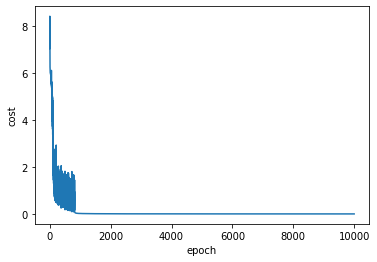

In [12]:
# epoch가 증가함에 따라 cost가 어떻게 줄어드는 지 나타내는 그래프
import matplotlib.pyplot as plt
N = [i for i in range(epochs)]
plt.plot(N,C)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

# (c)

|$i_1$|$i_2$|$i_3$|$\hat{t}$|
|:--:|:--:|:--:|:--:|
|0.3|0.3|0.3||
|0.3|1.5|0.3||
|1.5|0.3|1.5||
|1.5|1.5|1.5||

**학습이 끝난 가중치와 편향을 이용하여, 다음 4개의 입력값에 대한 출력값을 적고 target값을 예측하여라.**

**----- 풀이 -----**

- $y_1 = w_1 i_1 + w_2 i_2  + w_3 i_3 + b_1$ <br>
- $y_2 = w_4 i_1 + w_5 i_2 + w_6 i_3 + b_2$ <br>
- $h_1 = Sigmoid(w_1 i_1 + w_2 i_2  + w_3 i_3 + b_1)$ <br>
- $h_2 = Sigmoid(w_4 i_1 + w_5 i_2 + w_6 i_3 + b_2)$ <br>
- $n = w_7 h_1 + w_8 h_2 +b_3$
- $o = Sigmoid(w_7 h_1 + w_8 h_2 +b_3)$



In [14]:
pre_i1list = [0.3,0.3,1.5,1.5]
pre_i2list = [0.3,1.5,0.3,1.5]
pre_i3list = [0.3,0.3,1.5,1.5]
for i in range(len(pre_i1list)):
  i1 = pre_i1list[i] ; i2 = pre_i2list[i] ; i3 = pre_i3list[i]
  h1 = s(w[1]*i1 + w[2]*i2 + w[3]*i3 + b1) ; h2 = s(w[4]*i1 + w[5]*i2 + w[6]*i3 + b2)
  o = s(w[7]*h1 + w[8]*h2 + b3)
  print('%d번째 데이터 : (%.1f, %.1f, %.1f) => 예측한 t = %f' %(i+1,i1,i2,i3,o))

1번째 데이터 : (0.3, 0.3, 0.3) => 예측한 t = 0.998722
2번째 데이터 : (0.3, 1.5, 0.3) => 예측한 t = 0.998864
3번째 데이터 : (1.5, 0.3, 1.5) => 예측한 t = 0.886528
4번째 데이터 : (1.5, 1.5, 1.5) => 예측한 t = 0.996273
